In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../DATA/penguins_size.csv")

In [3]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
100*(10/344)

2.9069767441860463

In [7]:
df = df.dropna()

In [8]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [9]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
df = df[df['sex'] != '-']

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

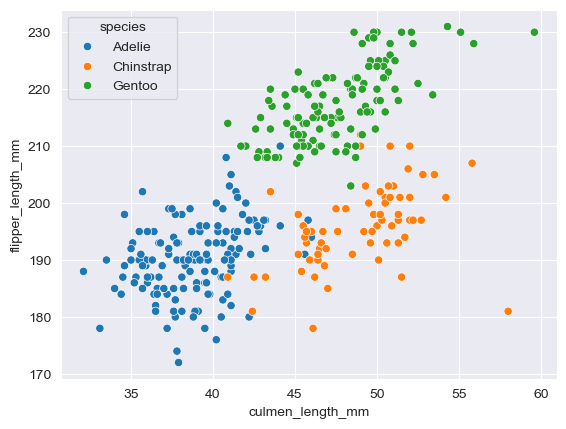

In [14]:
sns.scatterplot(x='culmen_length_mm', y='flipper_length_mm', data=df, hue='species')

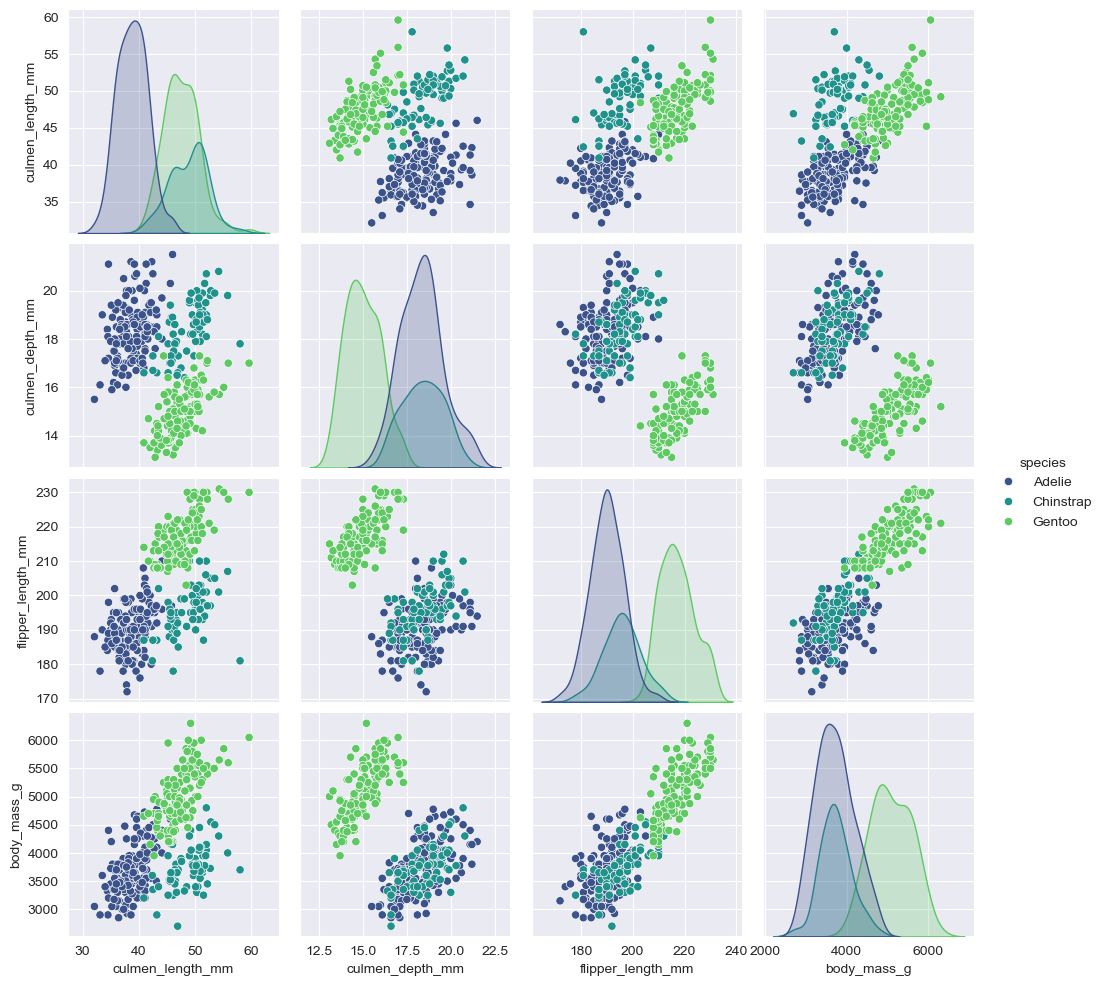

In [15]:
sns.pairplot(df, hue='species', palette='viridis')

C:\Users\Zygim\AppData\Local\Temp\ipykernel_42320\2665956932.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='species', y='culmen_length_mm', data=df, kind='box', palette='viridis')


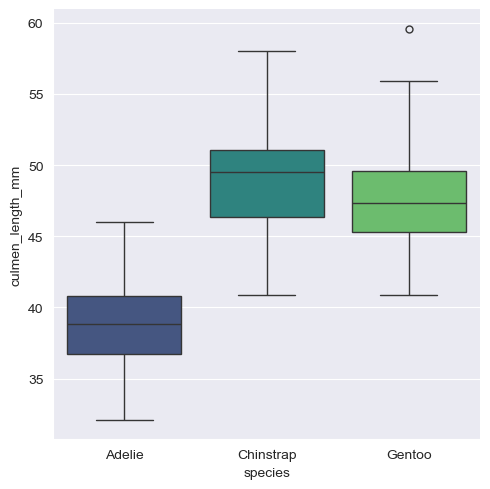

In [17]:
sns.catplot(x='species', y='culmen_length_mm', data=df, kind='box', palette='viridis')

In [18]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,False,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,False,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,False,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True,True,False,False,False,True,False
340,46.8,14.3,215.0,4850.0,False,False,True,True,False,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,True,True,False,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,True,False,False,False,True,False


In [22]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model = DecisionTreeClassifier()

In [27]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
base_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [30]:
accuracy_score(y_test, base_pred)

0.9405940594059405

In [31]:
confusion_matrix(y_test, base_pred)

array([[39,  2,  0],
       [ 4, 19,  0],
       [ 0,  0, 37]], dtype=int64)

In [33]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101



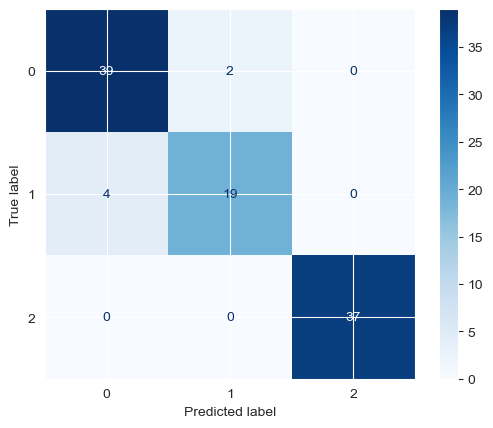

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y_test, base_pred)).plot(cmap='Blues')

In [36]:
pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

,Feature Importance
flipper_length_mm,0.531201
culmen_length_mm,0.323520
island_Dream,0.068185
culmen_depth_mm,0.042040
body_mass_g,0.013251
sex_MALE,0.011628
island_Torgersen,0.010175
sex_FEMALE,0.000000


In [37]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.323520
culmen_depth_mm,0.042040
flipper_length_mm,0.531201
body_mass_g,0.013251
island_Dream,0.068185
island_Torgersen,0.010175
sex_FEMALE,0.000000
sex_MALE,0.011628


<Axes: xlabel='species', ylabel='culmen_length_mm'>

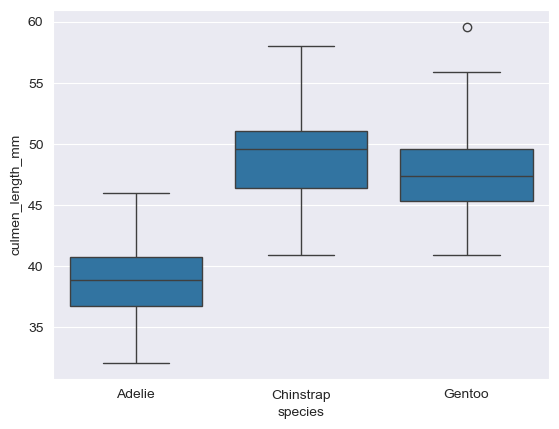

In [39]:
sns.boxplot(x='species', y='culmen_length_mm', data=df)

In [40]:
from sklearn.tree import plot_tree

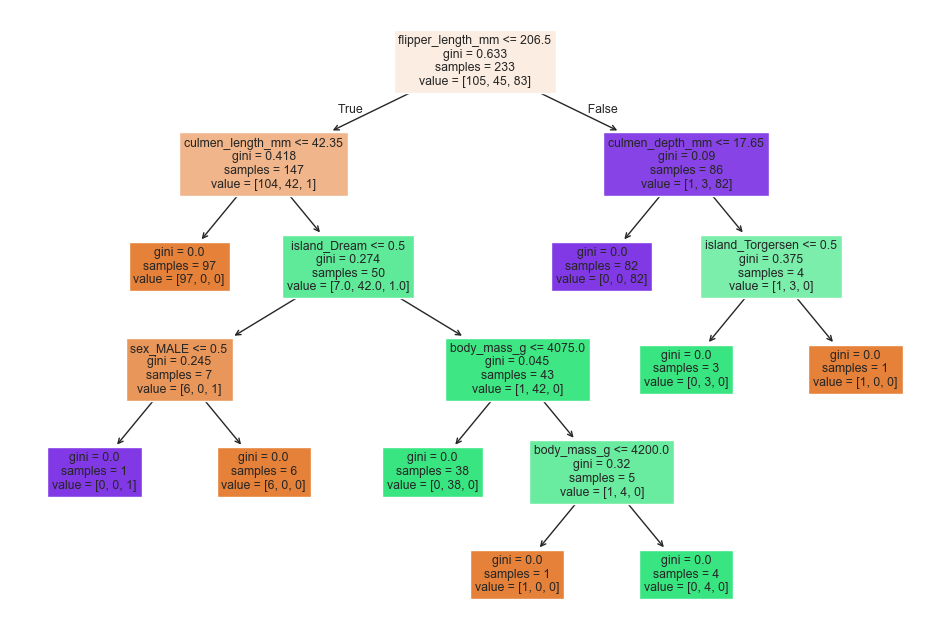

In [43]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

In [44]:
model.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

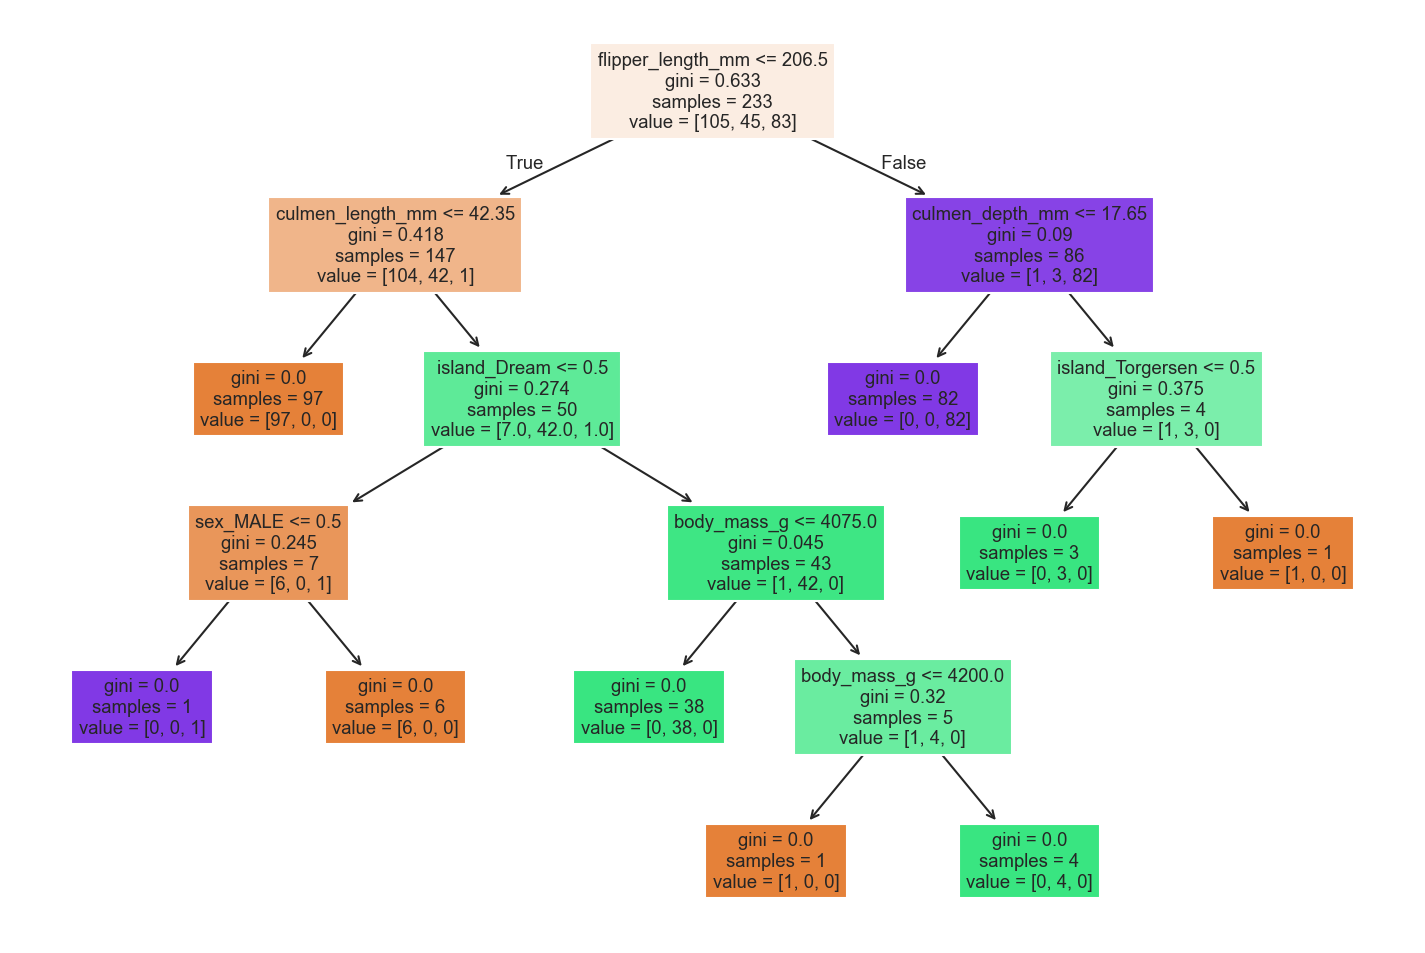

In [45]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

In [52]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True,feature_names=X.columns);

In [53]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





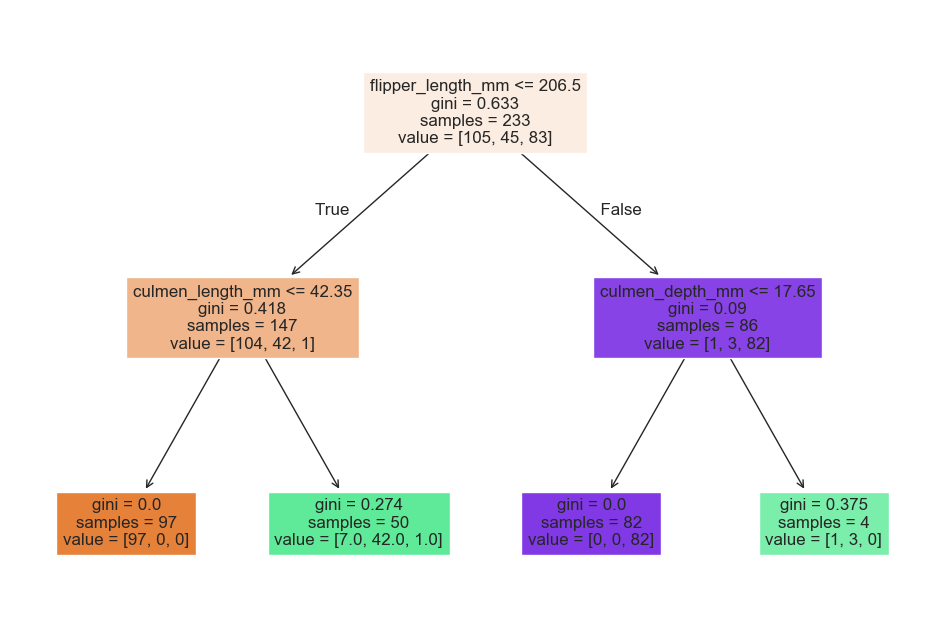

In [54]:
report_model(pruned_tree)

In [55]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





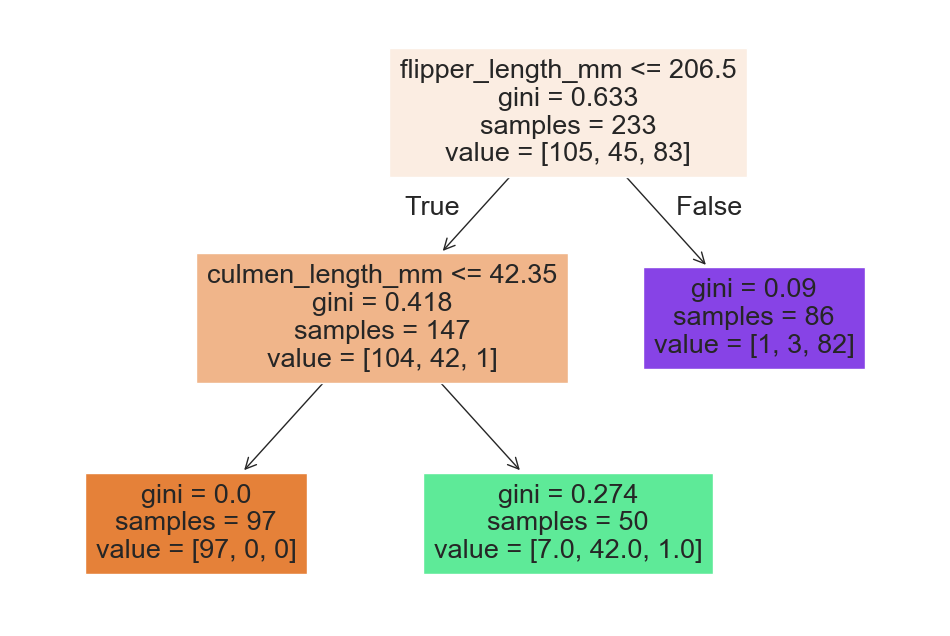

In [56]:
report_model(pruned_tree)

In [57]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





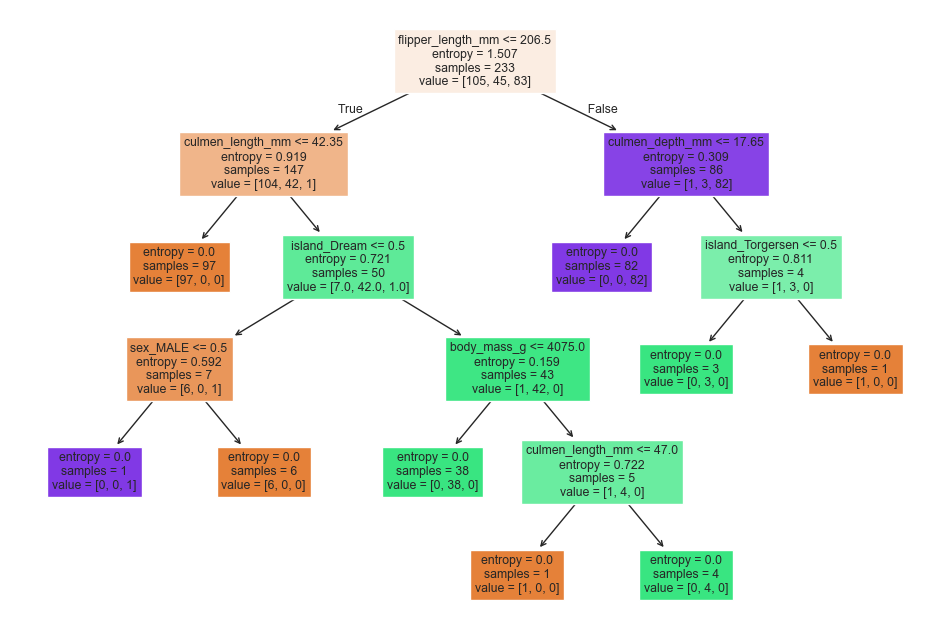

In [58]:
report_model(entropy_tree)